In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
data_titanik = pd.read_csv('train.csv')
data_titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Statistik Descriptif

In [9]:
data_titanik.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Cek Nilai Yang Kosong

In [11]:
data_titanik.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprosesing

#### Mencari Nilai Median Pada Kolom Age

In [13]:
median_age = data_titanik['Age'].median()
median_age

28.0

#### Isi Kolom Age dengan Nilai Median

In [15]:
data_titanik['Age'] = data_titanik['Age'].fillna(data_titanik['Age'].median())
data_titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Mencari Nilai Modus Kolom Embarked

In [17]:
modus_embarked = data_titanik['Embarked'].mode()[0]
modus_embarked

'S'

#### Isi Nilai Modus pada Kolom yang kosong di Embarked 

In [19]:
data_titanik['Embarked'] = data_titanik['Embarked'].fillna(data_titanik['Embarked'].mode()[0])
data_titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Drop/ hapus kolom cabin karena banyak yang kosong

In [180]:
data_titanik = data_titanik.drop('Cabin', axis=1)
data_titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Cek Hasil Data Setelah Preprosesing

In [22]:
data_titanik.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
data_titanik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# check the duplicates
duplicates = data_titanik[data_titanik.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


# EDA

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

### Analisis Kolom Age

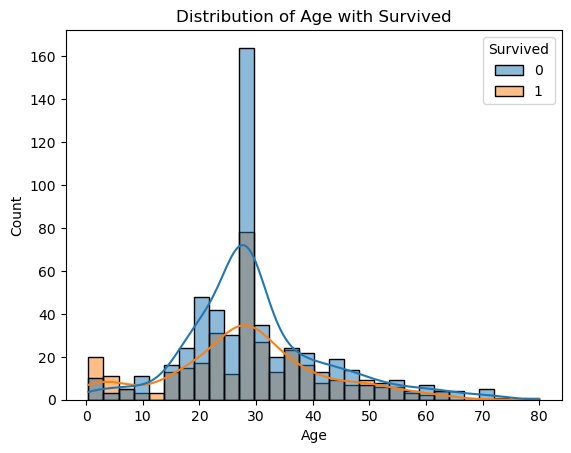

In [60]:
sns.histplot(data=data_titanik, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

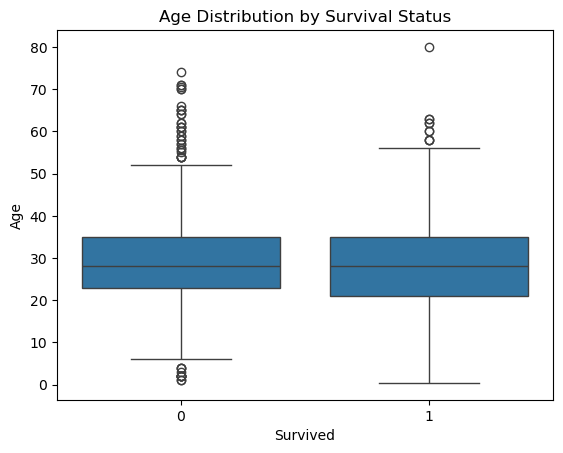

In [64]:
sns.boxplot(data=data_titanik, x='Survived', y='Age')
plt.title('Age Distribution by Survival Status')
plt.show()

### Analisis Kolom Fare

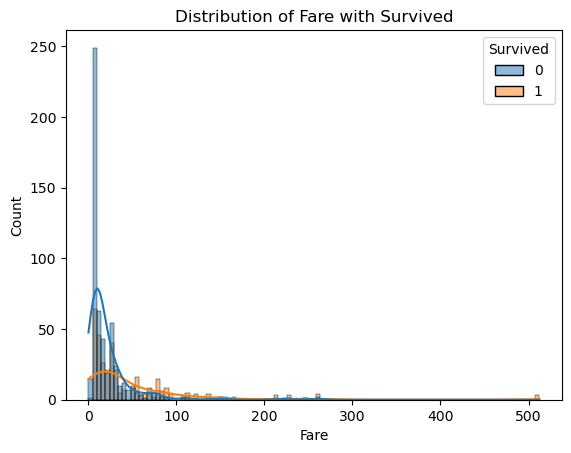

In [67]:
sns.histplot(data=data_titanik, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

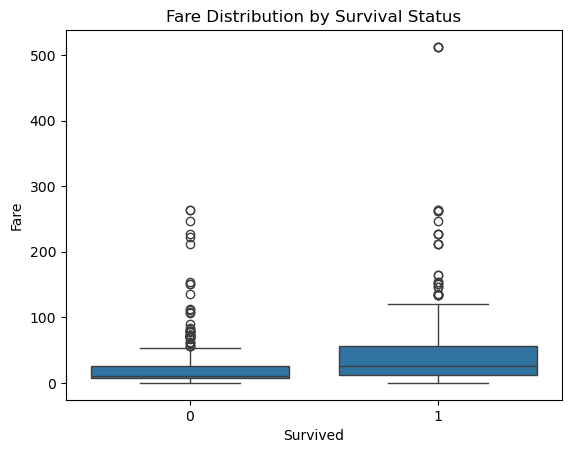

In [69]:
sns.boxplot(data=data_titanik, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()

### Analisis Kolom Pclass

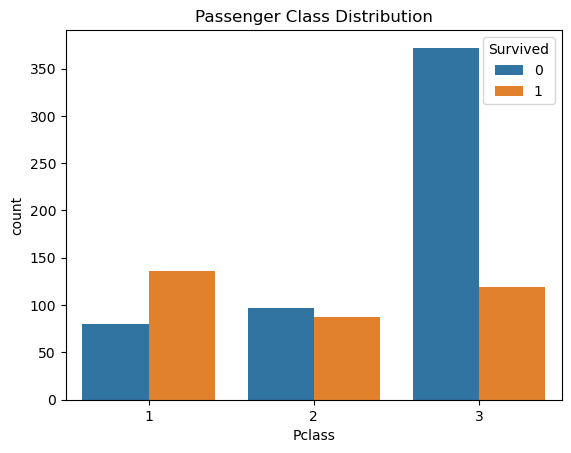

In [74]:
sns.countplot(data=data_titanik, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

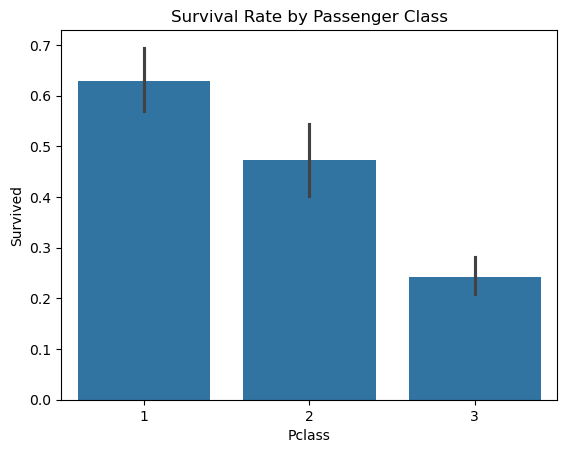

In [76]:
sns.barplot(data=data_titanik, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

### Analisis Kolom Sex (Jenis Kelamin)

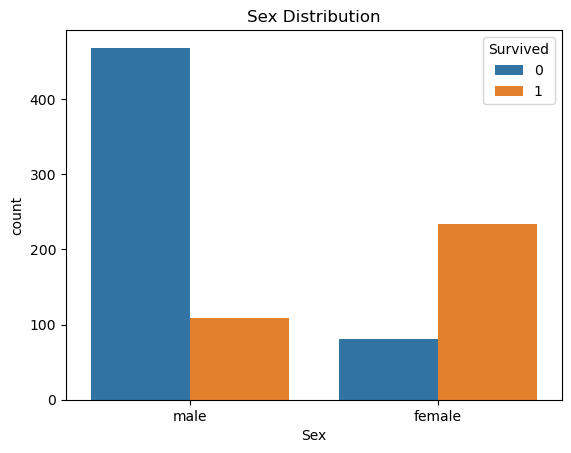

In [81]:
sns.countplot(data=data_titanik, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

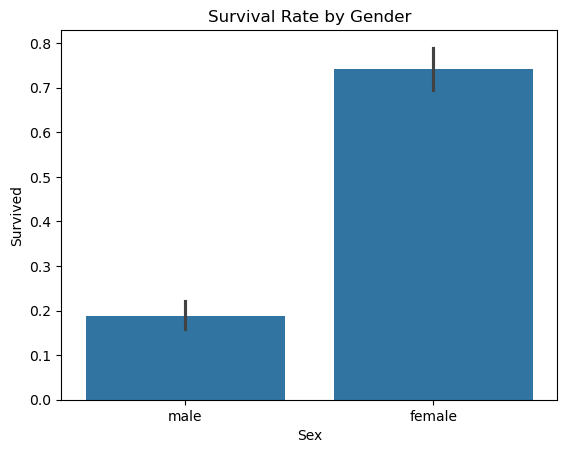

In [83]:
sns.barplot(data=data_titanik, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

### Analisis Kolom Parch

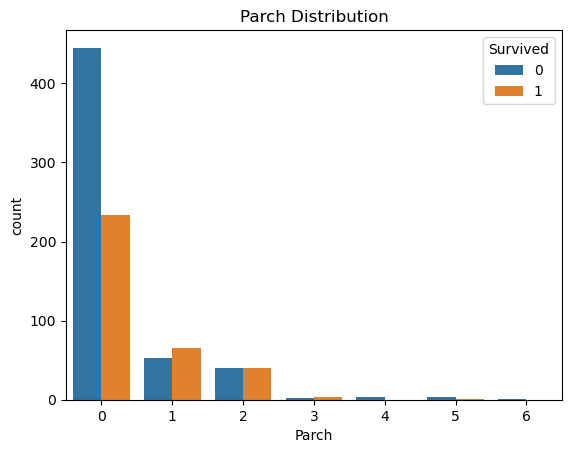

In [86]:
sns.countplot(data=data_titanik, x='Parch', hue='Survived')
plt.title('Parch Distribution')
plt.show()

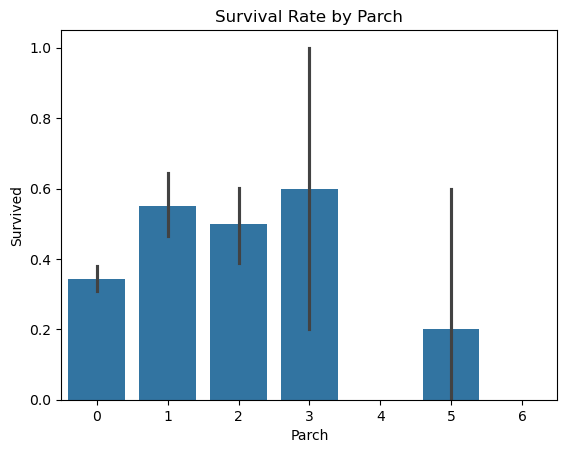

In [88]:
sns.barplot(data=data_titanik, x='Parch', y='Survived')
plt.title('Survival Rate by Parch')
plt.show()

### Analisis Kolom SibSp

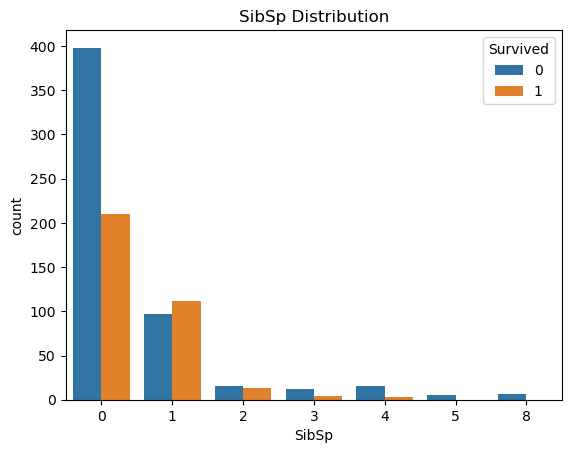

In [91]:
sns.countplot(data=data_titanik, x='SibSp', hue='Survived')
plt.title('SibSp Distribution')
plt.show()

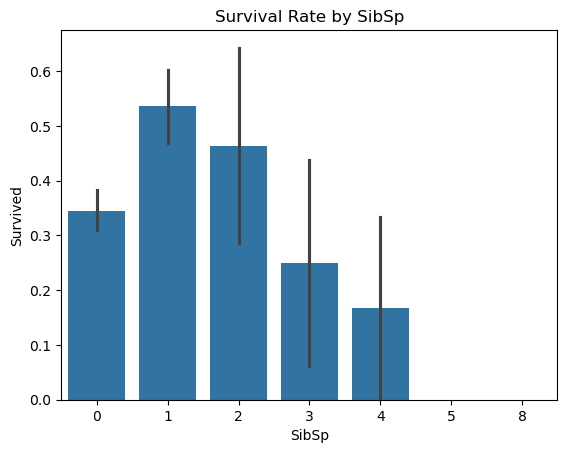

In [93]:
sns.barplot(data=data_titanik, x='SibSp', y='Survived')
plt.title('Survival Rate by SibSp')
plt.show()

### Correlation Matrix

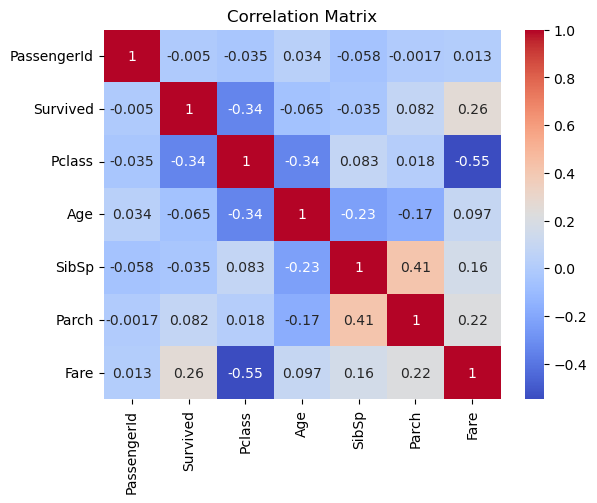

In [96]:
corr_matrix = data_titanik.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [98]:
data_titanik.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


#### Label Encoder untuk mengubah data kategorik menjadi numerik

In [100]:
le = LabelEncoder()
data_titanik['Sex'] = le.fit_transform(data_titanik['Sex'])
data_titanik['Embarked'] = le.fit_transform(data_titanik['Embarked'])

In [102]:
data_titanik.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


#### Feature Selection

In [104]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = data_titanik[features]
y = data_titanik['Survived']

In [106]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [108]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Train Test Split, Memisahkan data untuk dilatih dan diuji

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Data train

In [112]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [114]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [116]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [118]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

#### Membangun classification model menggunakan Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

#### Evaluasi

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Prediksi data test menggunakan model random forest yang sudah dibangun

In [126]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [128]:
data_titanik_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
data_titanik_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


#### Buat confusion matrix

In [130]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


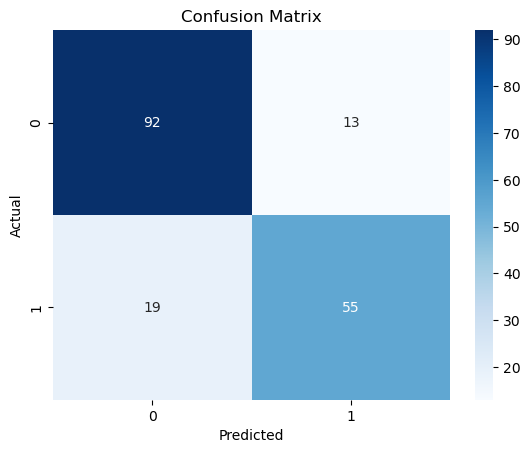

In [207]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Hitung akurasi dari prediksi

In [209]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


#### Feature importances (khusus random forest)

In [211]:
feature_importance = model.feature_importances_

feature_names = x_train.columns

data_titanik_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

data_titanik_feature_importance = data_titanik_feature_importance.sort_values(by='Importance', ascending=False)
data_titanik_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044
